# Working with data with a regression example

In [21]:
# 
# conda activate uitnn
# 
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import random

random.seed(42)
np.random.seed(42)
#torch.manual_seed(42)


## Data loader

In [22]:
# Load the Breast Cancer dataset
def load_data(dir_name):
    """
    Function for loading MNIST data stored in comma delimited files. Labels for 
    each image are the first entry in each row.

    Parameters
    ----------
    dit_name : str
         Path to where data is contained

    Returns
    -------
    X : array_like
        A (N x p=784) matrix of samples 
    Y : array_like
        A (N x 1) matrix of labels for each sample
    """
    data = list() # init a list called `data`
    
    with open(dir_name,"r") as f: # open the directory as a read ("r"), call it `f`
        for line in f: # iterate through each `line` in `f`
            split_line = np.array(line.split(',')) # split lines by `,` - cast the resultant list into an numpy array
            split_line = split_line.astype(np.float32) # make the numpy array of str into floats
            data.append(split_line) # collect the sample int888o the `data` list
            
    data = np.asarray(data) # convert the `data` list into a numpy array for easier indexing
    
    # as the first number in each sample is the label (0-9), extract that from the rest and return both (X,Y)
    return data[:,1:],data[:,0]

## Train and test data

In [23]:
_X_train,_Y_train = load_data("data/mnist_train.csv")
X_test,Y_test = load_data("data/mnist_test.csv")

print(f"The shape of the training set is: {_X_train.shape[0]} x {_X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")


The shape of the training set is: 60000 x 784
The shape of the test set is: 10000 x 784


Label: 5.0


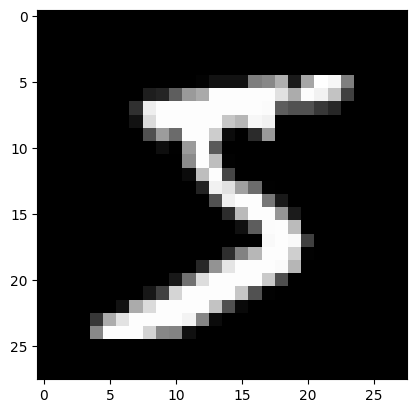

In [24]:
index = 0
print(f'Label: {_Y_train[index]}')

X_img = _X_train[index].reshape((28,28))/255.0
plt.imshow(X_img, interpolation='nearest', cmap='gray')
plt.show()


## Scaling and one-hot-encoding

In [25]:
# rescale data between 0 - 1.0
_X_train = _X_train/_X_train.max()
X_test = X_test/X_test.max()

# one-hot encode train (y_train) and test (y_test) set labels
_y_train = np.zeros((_Y_train.size, int(_Y_train.max()) + 1))
_y_train[np.arange(_Y_train.size),_Y_train.astype(np.int8)] = 1.0

assert _X_train.shape[0] == _y_train.shape[0], "Error: Number of feature and label paris should match in training"


y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
y_test[np.arange(Y_test.size),Y_test.astype(np.int8)] = 1.0
assert X_test.shape[0] == y_test.shape[0], "Error: Number of feature and label paris should match in testing"

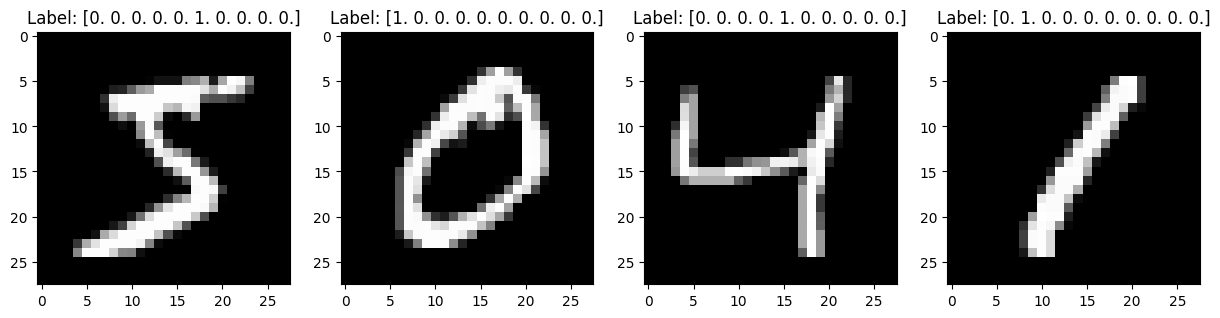

In [26]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(_X_train[:num_images],_y_train[:num_images],axes):
    ax.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1.0)
    ax.set_title(f"Label: {label}")



In [39]:
# Create validation dataset
TRAIN_VALIDATION_SPLIT = 0.15

X_train, X_valid = None, None
Y_train, Y_valid = None, None
for label in range(10):
    print(label)
    label_mask = _Y_train == label
    val_len = int(_Y_train[label_mask].shape[0]*TRAIN_VALIDATION_SPLIT + 0.5)

    val_sample = _X_train[label_mask][:val_len, :]
    val_label = _Y_train[label_mask][:val_len]
    trn_sample = _X_train[label_mask][val_len:, :]
    trn_label = _Y_train[label_mask][val_len:]
    
    
    X_train = trn_sample if X_train is None else np.vstack((X_train, trn_sample))
    X_valid = val_sample if X_valid is None else np.vstack((X_valid, val_sample))
    Y_train = trn_label[:, np.newaxis] if Y_train is None else np.vstack((Y_train, trn_label[:, np.newaxis]))
    Y_valid = val_label[:, np.newaxis] if Y_valid is None else np.vstack((Y_valid, val_label[:, np.newaxis]))
    
    print(X_train.shape, X_valid.shape)
    print(Y_train.shape, Y_valid.shape)

Y_train = Y_train[:, 0]
Y_valid = Y_valid[:, 0]

print(f'Training samples size: {X_train.shape}, {Y_train.shape}')
print(f'Validation samples size: {X_valid.shape}, {Y_valid.shape}')

0
(5035, 784) (888, 784)
(5035, 1) (888, 1)
1
(10766, 784) (1899, 784)
(10766, 1) (1899, 1)
2
(15830, 784) (2793, 784)
(15830, 1) (2793, 1)
3
(21041, 784) (3713, 784)
(21041, 1) (3713, 1)
4
(26007, 784) (4589, 784)
(26007, 1) (4589, 1)
5
(30615, 784) (5402, 784)
(30615, 1) (5402, 1)
6
(35645, 784) (6290, 784)
(35645, 1) (6290, 1)
7
(40970, 784) (7230, 784)
(40970, 1) (7230, 1)
8
(45943, 784) (8108, 784)
(45943, 1) (8108, 1)
9
(51000, 784) (9000, 784)
(51000, 1) (9000, 1)
Training samples size: (51000, 784), (51000,)
Validation samples size: (9000, 784), (9000,)


## Sample few datapoints for visualizing effect of training weights

In [40]:
VISUALIZE_SIZE = 50 # no.of samples per class
visualize_samples = {}

for label in range(10):
    sample_label_mask = Y_valid == label
    x_sample = X_valid[sample_label_mask][:VISUALIZE_SIZE, :]

    visualize_samples[label] = x_sample

for key,val in visualize_samples.items():
    print(f'label:{key}, val:{val.shape}')

label:0, val:(50, 784)
label:1, val:(50, 784)
label:2, val:(50, 784)
label:3, val:(50, 784)
label:4, val:(50, 784)
label:5, val:(50, 784)
label:6, val:(50, 784)
label:7, val:(50, 784)
label:8, val:(50, 784)
label:9, val:(50, 784)


## MLP class

In [41]:
class MLP():
    
    def __init__(self,X,Y,X_val,Y_val,L=1,N_l=128):
        self.X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.Y = np.squeeze(np.eye(10)[Y.astype(np.int8).reshape(-1)])
        self.X_val = np.concatenate((X_val,np.ones((X_val.shape[0],1))),axis=1)
        self.Y_val = np.squeeze(np.eye(10)[Y_val.astype(np.int8).reshape(-1)])
        self.L = L
        self.N_l = N_l
        self.n_samples = self.X.shape[0]
        self.layer_sizes =np.array([self.X.shape[1]]+[N_l]*L+[self.Y.shape[1]]) 
        self.__init_weights()
        self.train_loss = list()
        self.train_acc = list()
        self.val_loss = list()
        self.val_acc = list()
        self.train_time = list()
        self.tot_time = list()
        self.metrics = [self.train_loss,self.train_acc,self.val_loss,self.val_acc,self.train_time,self.tot_time]
        
    def __sigmoid(self,x):
        # VCompute the sigmoid
        return 1./(1.+np.exp(-x))
    
    def __softmax(self,x):
        # Compute softmax along the rows of the input
        exponent = np.exp(x)
        return exponent/exponent.sum(axis=1,keepdims=True)
    
    def __loss(self,y_pred,y):
        # Compute the loss along the rows, averaging along the number of samples
        return ((-np.log(y_pred))*y).sum(axis=1).mean()
    
    def __accuracy(self,y_pred,y):  
        # Compute the accuracy along the rows, averaging along the number of samples
        return np.all(y_pred==y,axis=1).mean()
    
    def __sigmoid_prime(self,h):
        # Compute the derivative of sigmoid where h=sigmoid(x)
        return h*(1-h)
    
    def __to_categorical(self,x):  
        # Transform probabilities into categorical predictions row-wise, by simply taking the max probability
        categorical = np.zeros((x.shape[0],self.Y.shape[1]))
        categorical[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
        return categorical
    
    def __init_weights(self):
        # Initialize the weights of the network given the sizes of the layers
        self.weights = list()
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))
        #self.weights = np.asarray(self.weights)
    
    def __init_layers(self,batch_size):
        # Initialize and allocate arrays for the hidden layer activations 
        self.__h = [np.empty((batch_size,layer)) for layer in self.layer_sizes]
    
    def __feed_forward(self,batch):
        # Perform a forward pass of `batch` samples (N_samples x N_features)
        h_l = batch
        self.__h[0] = h_l
        for i,weights in enumerate(self.weights):
            h_l = self.__sigmoid(h_l.dot(weights))
            self.__h[i+1]=h_l
        self.__out = self.__softmax(self.__h[-1])
    
    def __back_prop(self,batch_y):
        # Update the weights of the network through back-propagation
        delta_t = (self.__out - batch_y)*self.__sigmoid_prime(self.__h[-1])
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
            delta_t = self.__sigmoid_prime(self.__h[-i-1])*(delta_t.dot(self.weights[-i].T))
            
    def predict(self,X):
        # Generate a categorical, one-hot, prediction given an input X
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.__init_layers(X.shape[0])
        self.__feed_forward(X)
        return self.__to_categorical(self.__out)
    
    def labels(self,X):
        # Generate a categorical, one-hot, prediction given an input X
        cat = self.predict(X)
        return list(np.argmax(cat, axis=1))
    
    def evaluate(self,X,Y):
        # Evaluate the performance (accuracy) predicting on X with true labels Y
        prediction = self.predict(X)
        return self.__accuracy(prediction,Y)
        
    def train(self,batch_size=8,epochs=25,lr=1.0):
        # Train the model with a given batch size, epochs, and learning rate. Store and print relevant metrics.
        self.lr = lr
        self.batch_size=batch_size
        for epoch in range(epochs):
            start = time.time()
            
            self.__init_layers(self.batch_size)
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            train_acc = 0
            X_batches = np.array_split(self.X[shuffle],self.n_samples/self.batch_size)
            Y_batches = np.array_split(self.Y[shuffle],self.n_samples/self.batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.__feed_forward(batch_x)  
                train_loss += self.__loss(self.__out,batch_y)
                train_acc += self.__accuracy(self.__to_categorical(self.__out),batch_y)
                self.__back_prop(batch_y)
                
            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(X_batches))
            self.train_loss.append(train_loss)
            self.train_acc.append(train_acc)
            
            train_time = round(time.time()-start,3)
            self.train_time.append(train_time)
            
            self.__init_layers(self.X_val.shape[0])
            self.__feed_forward(self.X_val)
            val_loss = self.__loss(self.__out,self.Y_val)
            val_acc = self.__accuracy(self.__to_categorical(self.__out),self.Y_val)
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)
            
            tot_time = round(time.time()-start,3)
            self.tot_time.append(tot_time)
            
            print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")

## Train the model

In [43]:
model = MLP(X_train,Y_train, X_valid, Y_valid, L=1, N_l=128)
model.train(batch_size=8,epochs=25,lr=1.0)

Epoch 1: loss = 1.59 | acc = 0.872 | val_loss = 1.537 | val_acc = 0.926 | train_time = 2.694 | tot_time = 2.734
Epoch 2: loss = 1.527 | acc = 0.935 | val_loss = 1.52 | val_acc = 0.941 | train_time = 2.737 | tot_time = 2.777
Epoch 3: loss = 1.513 | acc = 0.948 | val_loss = 1.516 | val_acc = 0.946 | train_time = 2.742 | tot_time = 2.785
Epoch 4: loss = 1.505 | acc = 0.956 | val_loss = 1.51 | val_acc = 0.951 | train_time = 2.748 | tot_time = 2.787
Epoch 5: loss = 1.5 | acc = 0.96 | val_loss = 1.506 | val_acc = 0.956 | train_time = 2.7 | tot_time = 2.755
Epoch 6: loss = 1.496 | acc = 0.965 | val_loss = 1.505 | val_acc = 0.957 | train_time = 3.736 | tot_time = 3.781
Epoch 7: loss = 1.492 | acc = 0.968 | val_loss = 1.505 | val_acc = 0.957 | train_time = 3.712 | tot_time = 3.758
Epoch 8: loss = 1.49 | acc = 0.972 | val_loss = 1.502 | val_acc = 0.96 | train_time = 3.696 | tot_time = 3.742
Epoch 9: loss = 1.487 | acc = 0.973 | val_loss = 1.5 | val_acc = 0.961 | train_time = 3.774 | tot_time = 3

# Loss curve

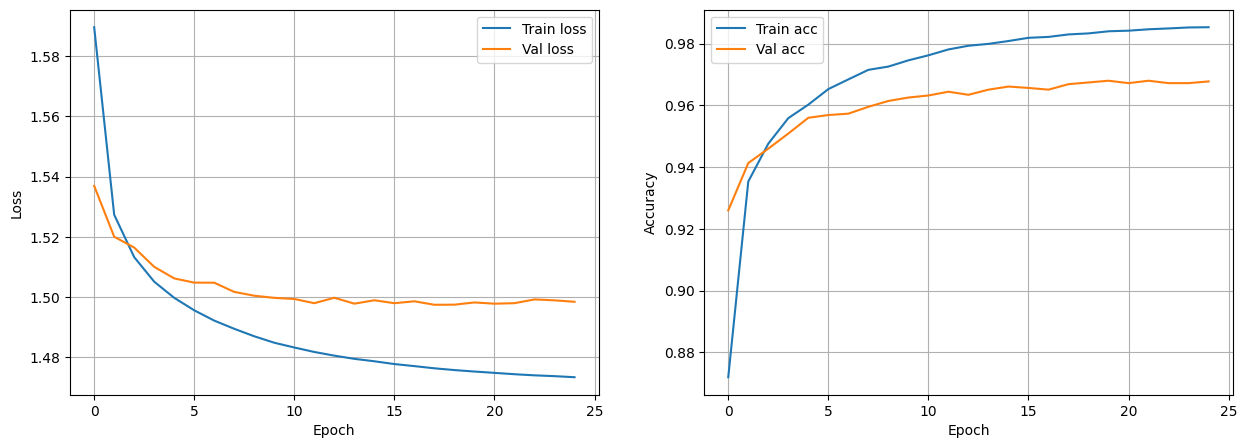

In [44]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(model.train_loss,label="Train loss")
ax[0].plot(model.val_loss,label="Val loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(model.train_acc,label="Train acc")
ax[1].plot(model.val_acc,label="Val acc")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()


## Compute accuracy on test data

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

# Evaluate accuracy
y_pred = model.labels(X_test)
print(y_pred)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

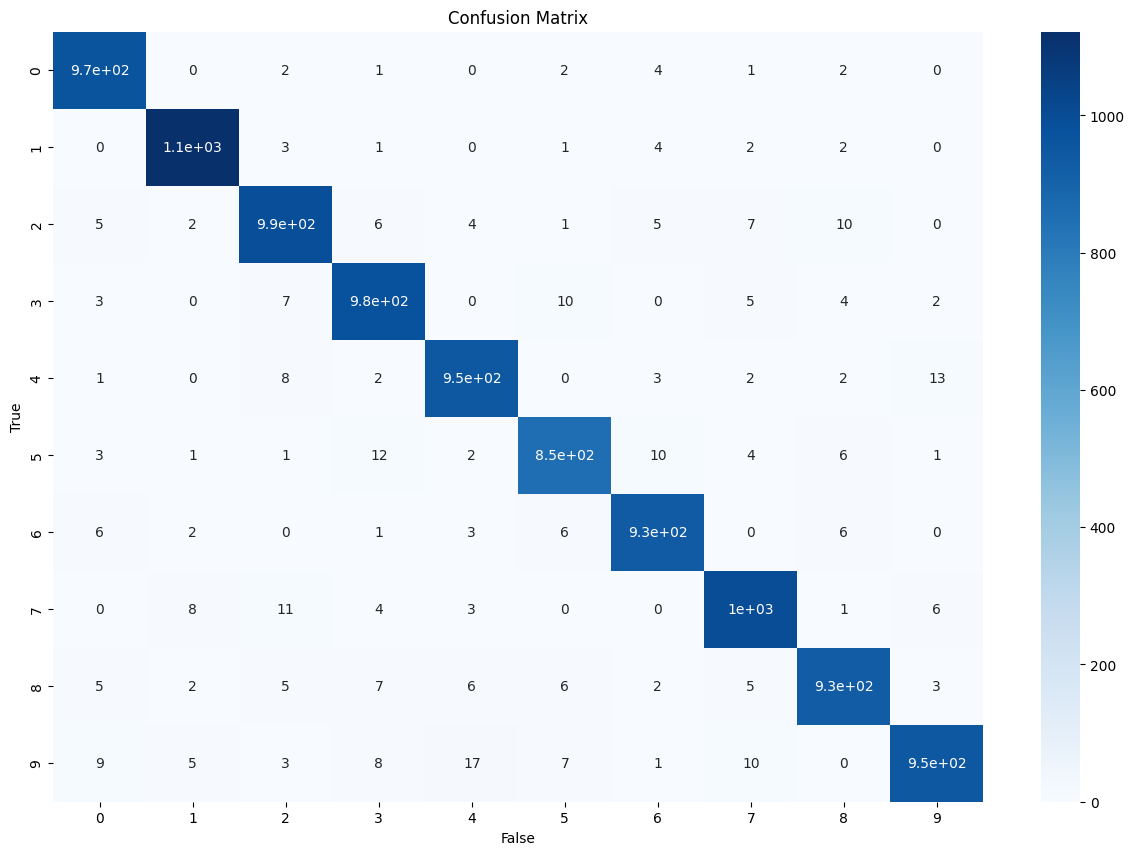

In [46]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues')
plt.ylabel('True')
plt.xlabel('False')
plt.title('Confusion Matrix')
plt.show()